> **SOMETIMES THE QUESTIONS ARE COMPLICATED AND THE ANSWERS ARE SIMPLE **

>*Dr. Seuss*

## Coin Toss

You toss a coin 30 times and see head 24 times. Is it a fair coin?

**Hypothesis 1**: Tossing a fair coin will get you 15 heads in 30 tosses. This coin is biased

**Hypothesis 2**: Come on, even a fair coin could show 24 heads in 30 tosses. This is just by chance

#### Statistical Method

P(H) = ? 

P(HH) = ?

P(THH) = ?

Now, slightly tougher : P(2H, 1T) = ?

Generalizing, 

<img style="float: left;" src="img/binomial.gif">

<br>
<br>
<br>
<br>


**What is the probability of getting 24 heads in 30 tosses ?**

It is the probability of getting heads 24 times or more. 

#### Hacker's Approach

Simulation. Run the experiment 100,000 times. Find the percentage of times the experiment returned 24 or more heads. If it is more than 5%, we conclude that the coin is biased. 

In [7]:
# Let's try running the experiment one time. If you see any functions you don't recognize, check for documentation/ask Google!
# Try running this cell multiple times to see how the output changes

import numpy as np  

total_tosses = 30
num_heads = 24

#0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0,2,total_tosses)
print("Data of the Experiment:", experiment)
# numpy.random.randint() is one of the function for doing random sampling in numpy. 
#It returns an array of specified shape and fills it with random integers from low (inclusive) to high (exclusive), 
# i.e. in the interval [low, high)
#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1]) #This will give all the heads in the array
head_count = experiment[experiment==1].shape[0] #This will get the count of heads in the array.
# The shape property is usually used to get the current shape of an array.
print("Number of heads in the experiment:", head_count)

Data of the Experiment: [1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0]
Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment: 12


In [10]:
help(list.append)


Help on method_descriptor:

append(self, object, /)
    Append object to the end of the list.



In [20]:
# Now, let's try running the above experiment 100 times.
# Write a function that puts the above code in a loop.
# Every loop should run one trial of 30 coin flips.
# Your function should take 1 input (times_to_repeat) that specifies how many times to repeat the experiment.
# Your function should return an output array (head_count) that lists the number of heads in each trial.

def coin_toss_experiment(times_to_repeat):
    head_count= []
    for i in range (times_to_repeat):
        experiment = np.random.randint(0,2,30)  
        h_count = experiment[experiment==1].shape[0]
        head_count.append(h_count)
   
    
    return np.array(head_count)

In [44]:
head_count = coin_toss_experiment(100)

In [45]:
head_count[:10] 

array([13, 14, 16, 14, 17, 15, 19, 12, 17, 14])

In [46]:
#Let's plot the above distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

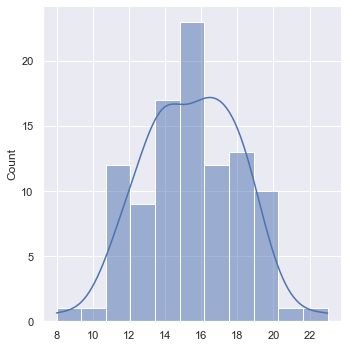

In [47]:
sns.displot(head_count, kde=True)

**Exercise**: Try setting `kde=True` in the above cell and observe what happens

In [48]:
#Number of times the experiment returned 24 heads.
head_count[head_count>=24]

array([], dtype=int64)

In [49]:
print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 24 heads or more: 0
% of times with 24 or more heads:  0.0


####  Exercise: Repeat the experiment 100,000 times. 

In [50]:
#What % of experiments out of 100,000 have 24 or more heads?

head_count = coin_toss_experiment(100000)
print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 24 heads or more: 52
% of times with 24 or more heads:  0.052


# Is the coin fair?

In [51]:
#What do you think?
# The coin is fair, because the percentage of times the experiment returned 24 or more heads is less than 5%.
# Therefore we conclude that the coin is not biased.
